In [1]:
# Import the packages we may need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df2 = pd.read_csv('Combined_df2.csv')


In [4]:
df2_dropped = df2.drop(df2.columns[:2], axis=1)
df2_dropped

,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,O00182,Q14116,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,8.65712,7.81074,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,8.46706,8.18828,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,9.09830,9.15899,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,8.72250,8.57028,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,8.80904,8.18094,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,7.66455,7.96187,8.03016,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,7.84437,7.17525,7.93368,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,8.15014,7.59132,8.38650,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,8.17975,7.56307,8.67965,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [5]:
# Check if there are any NaNs in the DataFrame
has_nans = df2_dropped.isna().any().any()
print(f"Any NaN values in the DataFrame: {has_nans}")

Any NaN values in the DataFrame: True


In [8]:
# Display rows with any NaN values
nan_rows = df2_dropped[df2_dropped.isna().any(axis=1)]
#print("Rows with NaN values:") #to see the nan rows.
#print(nan_rows)

In [7]:
# Drop rows with any NaN values
df2_cleaned = df2_dropped.dropna()

# Save the cleaned DataFrame to a CSV file
df2_cleaned.to_csv('cleaned_dropped_data.csv', index=False)

print("Cleaned data saved as 'cleaned_dropped_data.csv'.")

Cleaned data saved as 'cleaned_dropped_data.csv'.


In [9]:
df2_cleaned

,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,O00182,Q14116,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,8.65712,7.81074,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,8.46706,8.18828,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,9.09830,9.15899,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,8.72250,8.57028,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,8.80904,8.18094,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,7.66455,7.96187,8.03016,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,7.84437,7.17525,7.93368,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,8.15014,7.59132,8.38650,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,8.17975,7.56307,8.67965,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [10]:
# Display rows with any NaN values
nan_rows = df2_cleaned[df2_cleaned.isna().any(axis=1)]
print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
Empty DataFrame
Columns: [Sample_ID, Cancer, Q15389, P29965, P49763, Q02763, P01127, P09341, O00182, Q14116, P09601, Q92583, P10147, P09237, P07585, P39900, Q9BQ51, P01730, P13500, P09038, P10747, P22301, Q13241, O76036, P48061, Q9UQV4, P42701, P18627, P05113, Q01151, O95727, P12544, Q9NP84, O75509, P15692, P01133, P05231, P50591, P35968, P20718, P48023, P09382, Q16790, P26842, P14210, P43489, O75144, O43927, P32970, Q8WXI7, P10144]
Index: []

[0 rows x 51 columns]


In [13]:
# Prepare the data
X = df2_cleaned.drop(columns=['Sample_ID', 'Cancer'])
y = df2_cleaned['Cancer']

# Check class distribution
print(y.value_counts())

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
logistic_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
logistic_model.fit(X_train_scaled, y_train)


# Make predictions
y_pred = logistic_model.predict(X_test_scaled)



LUNGC    219
CRC      182
Ctrl     167
HODG     166
PRC      119
BRC      117
GLIOM    103
OVC      102
ESO       91
ENDC      82
CVX       72
LYMPH     41
AML       38
CLL       32
MYEL      21
Name: Cancer, dtype: int64


In [14]:
# Check accuracy
accuracy = logistic_model.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')



Accuracy: 0.684887459807074


In [15]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         AML       1.00      0.75      0.86         8
         BRC       0.25      0.21      0.23        24
         CLL       1.00      0.67      0.80         6
         CRC       0.44      0.59      0.51        37
         CVX       0.45      0.36      0.40        14
        Ctrl       1.00      1.00      1.00        34
        ENDC       0.50      0.25      0.33        16
         ESO       1.00      1.00      1.00        18
       GLIOM       0.83      0.71      0.77        21
        HODG       1.00      1.00      1.00        33
       LUNGC       0.60      0.68      0.64        44
       LYMPH       0.78      0.88      0.82         8
        MYEL       0.80      1.00      0.89         4
         OVC       0.71      0.60      0.65        20
         PRC       0.50      0.58      0.54        24

    accuracy                           0.68       311
   macro avg       0.72      0.69      0.70       311
we

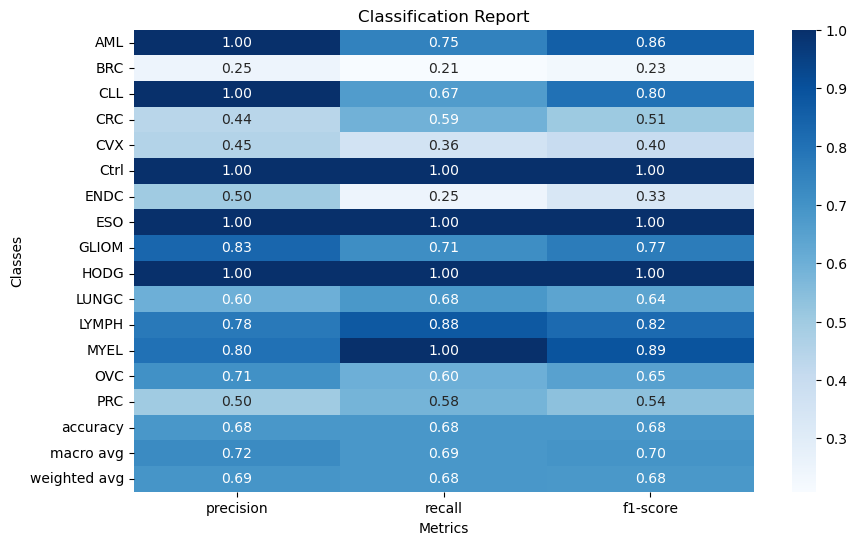

In [43]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for easier plotting
report_df = pd.DataFrame(report)

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('Classification_Report.png', format='png', dpi=300)  # Adjust dpi for resolution
plt.show()

In [16]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 6  0  0  1  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  5  0  8  0  0  2  0  2  0  3  0  0  1  3]
 [ 0  0  4  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  3  0 22  2  0  0  0  0  0  6  0  0  0  4]
 [ 0  5  0  1  5  0  1  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  4  1  0  4  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0 15  0  2  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0]
 [ 0  1  0  6  0  0  1  0  1  0 30  0  0  2  3]
 [ 0  0  0  1  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  2  1  0  0  0  0  0  5  0  0 12  0]
 [ 0  2  0  4  1  0  0  0  0  0  3  0  0  0 14]]


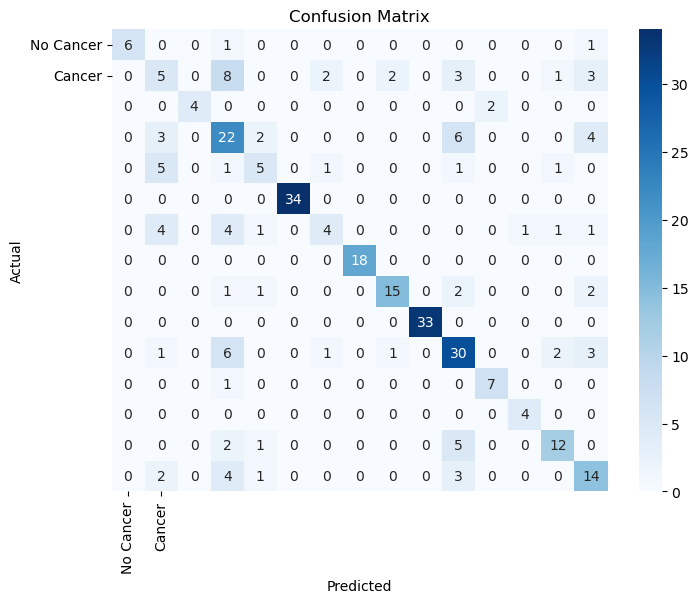

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion_Matrix.png', format='png', dpi=300)  # Adjust dpi for resolution
plt.show()